In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df=pd.read_csv("../data/Telco-Customer-Churn.csv")

In [3]:
# Preview the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Data types, missing values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical summary of numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

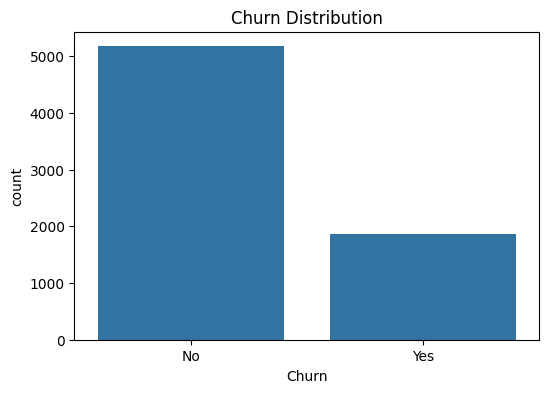

In [7]:
# Count plot for churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.savefig("../results/figures/churn_distribution.png")
plt.show()

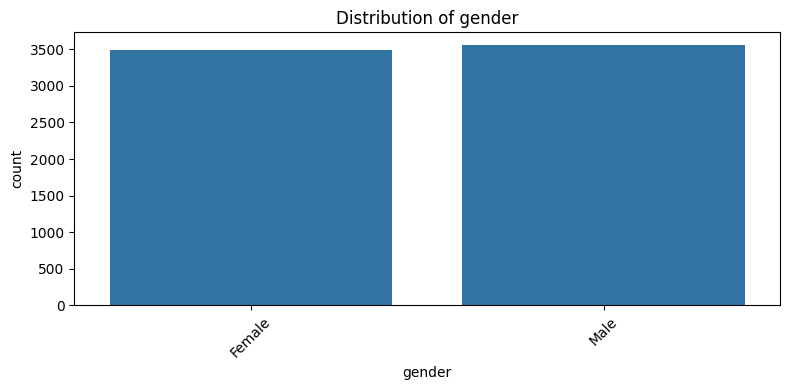

gender
Male      3555
Female    3488
Name: count, dtype: int64




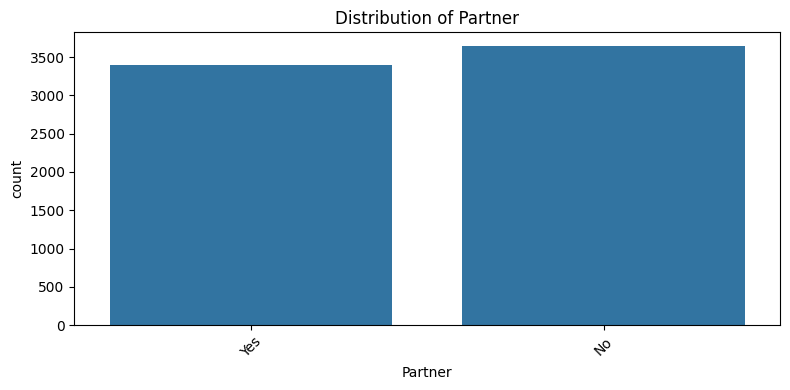

Partner
No     3641
Yes    3402
Name: count, dtype: int64




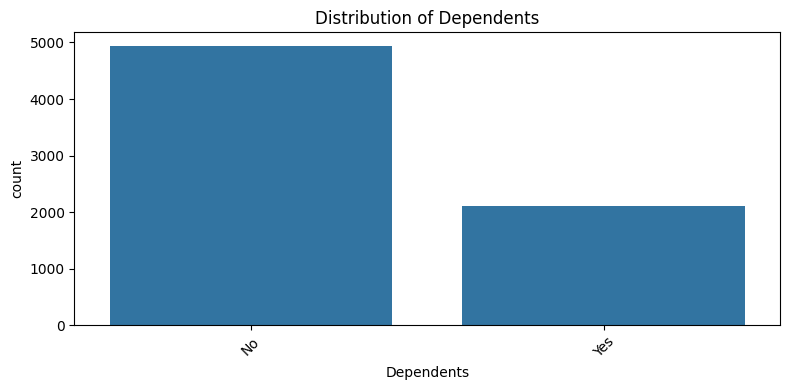

Dependents
No     4933
Yes    2110
Name: count, dtype: int64




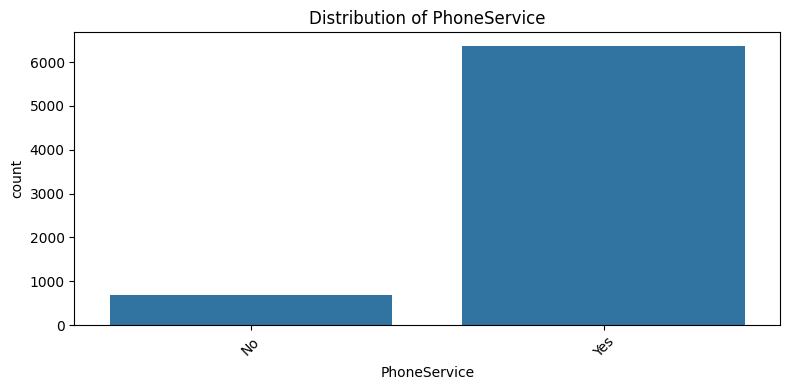

PhoneService
Yes    6361
No      682
Name: count, dtype: int64




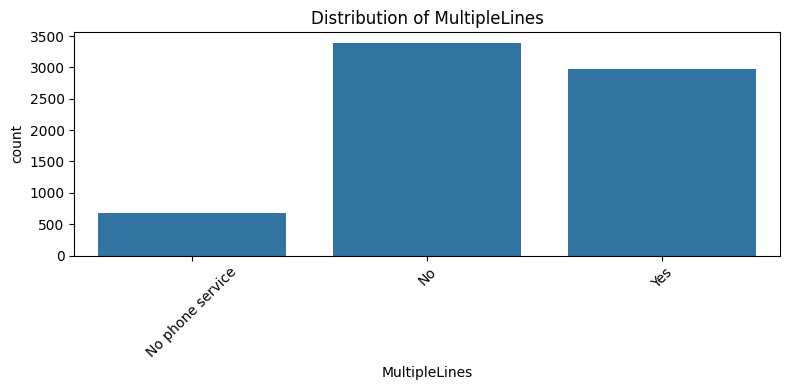

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64




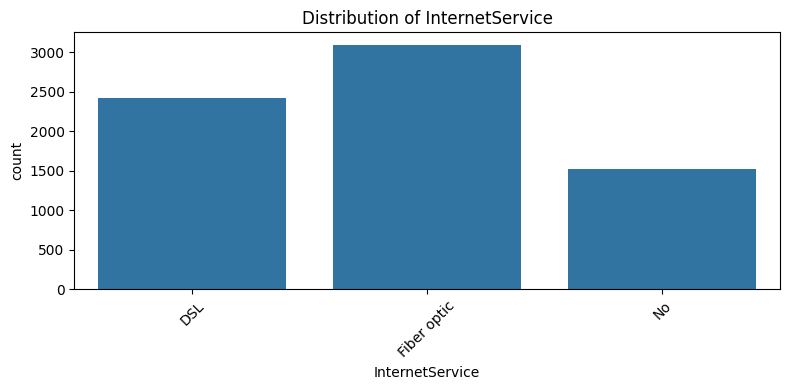

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64




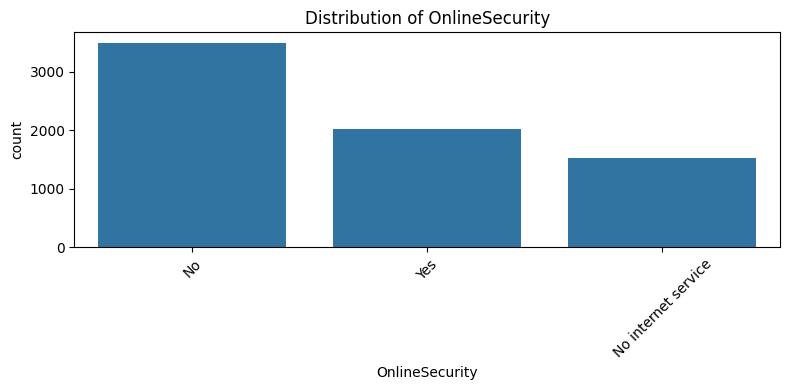

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64




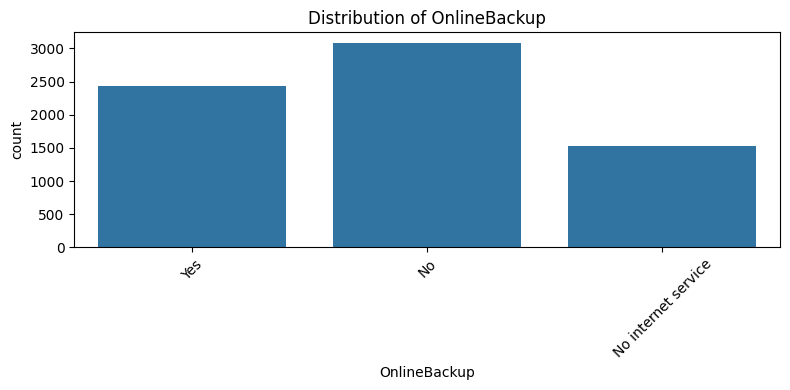

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64




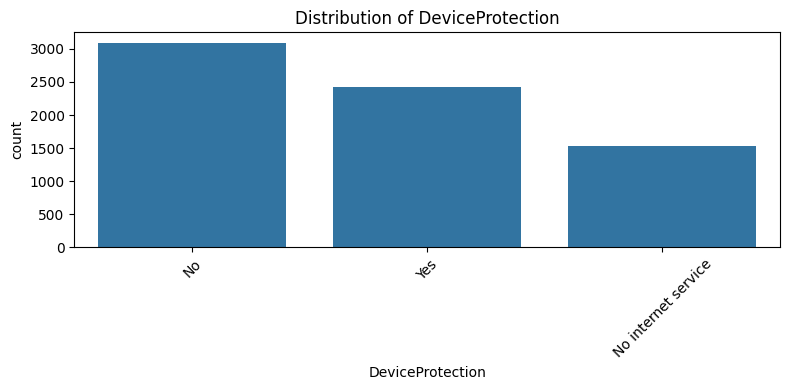

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64




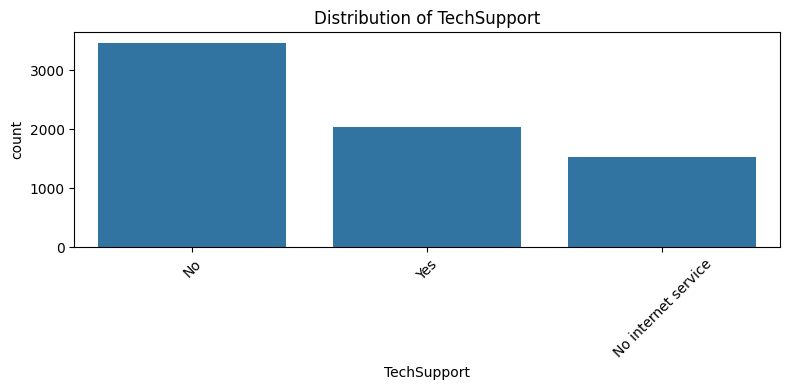

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64




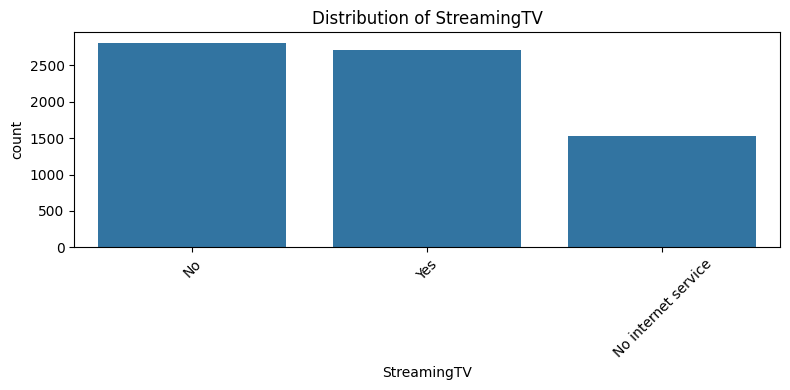

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64




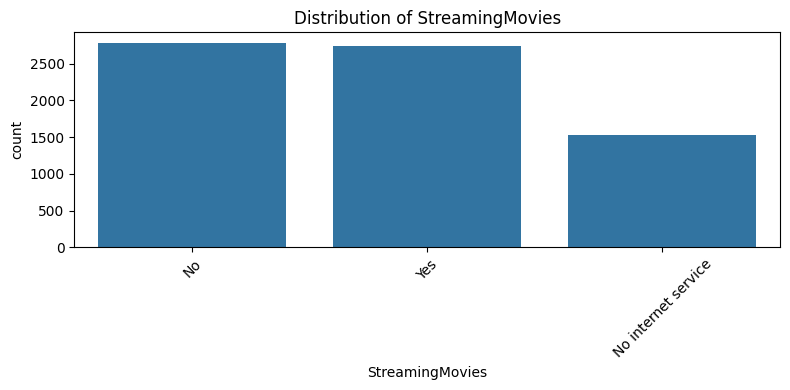

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64




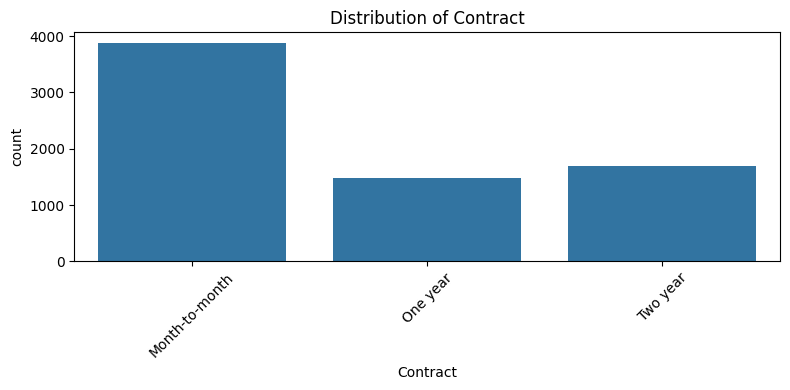

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64




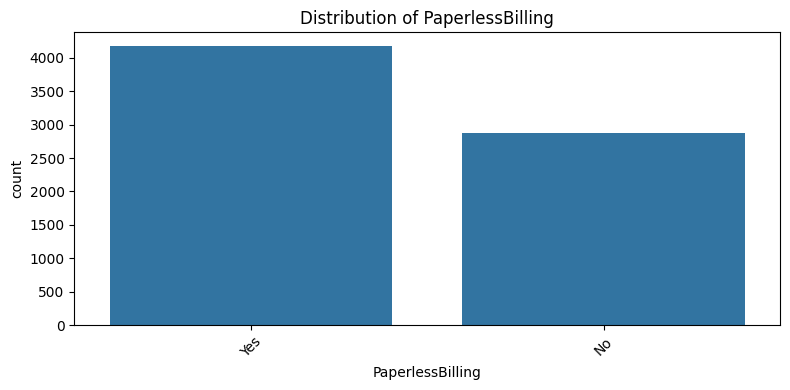

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64




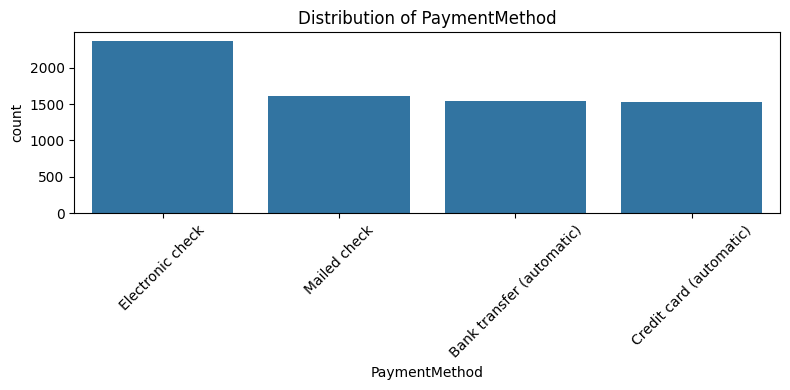

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64




In [9]:
exclude_cols = ['customerID', 'Churn', 'TotalCharges']
cat_cols_to_plot = [col for col in cat_cols if col not in exclude_cols]

import os
os.makedirs("../results/figures", exist_ok=True)

for col in cat_cols_to_plot:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../results/figures/{col}_distribution.png")
    plt.show()
    print(df[col].value_counts())
    print("\n")


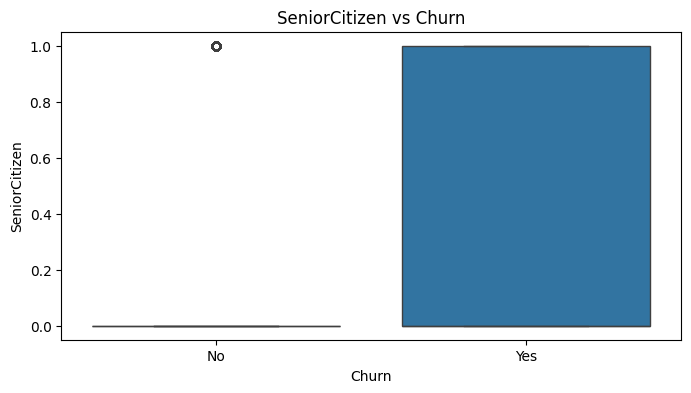

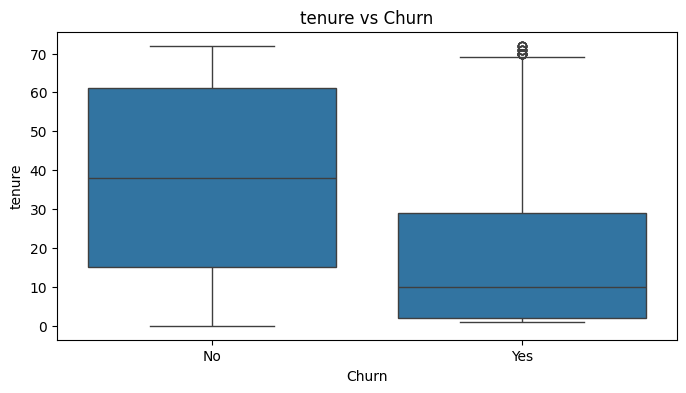

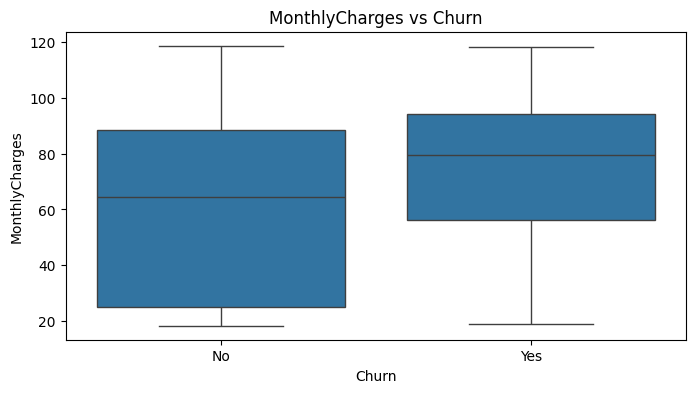

In [10]:
# 6. Explore Numeric Features
numeric_cols = df.select_dtypes(include=np.number).columns

# Boxplots to check distribution and outliers
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.savefig(f"../results/figures/{col}_boxplot.png")
    plt.show()

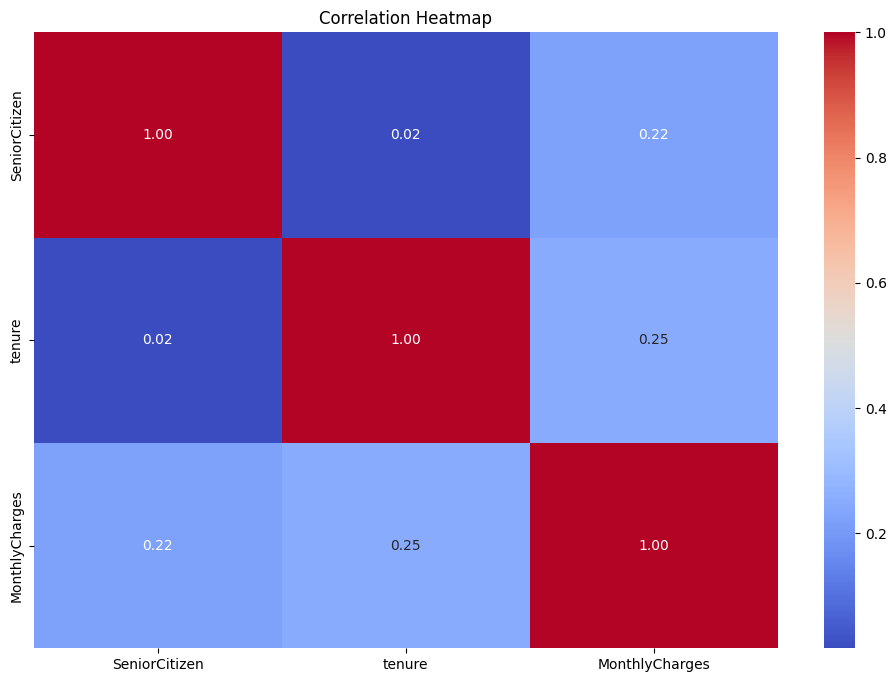

In [11]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("../results/figures/correlation_heatmap.png")
plt.show()

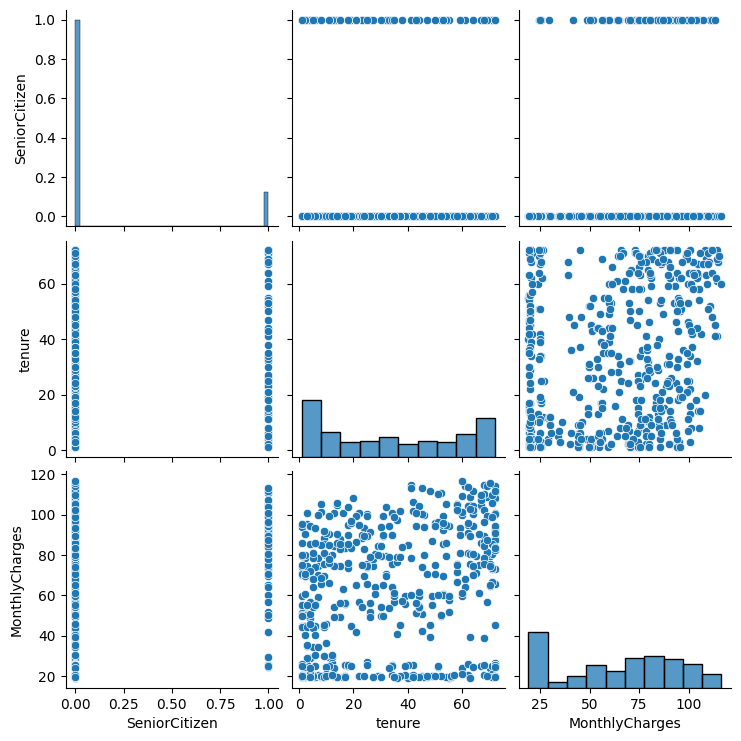

In [12]:
# Pairplot (optional, sample if dataset is large)
sns.pairplot(df[numeric_cols].sample(500))
plt.savefig("../results/figures/pairplot.png")
plt.show()